In [20]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt

from sim_utils import *
from simulation import *

In [28]:
import sim_utils
importlib.reload(sim_utils)
from sim_utils import *

### simulate num_simulations times

In [ ]:
num_topics = 20
num_simulations = 100
doc_args = {"num_covs":2, "min_words": 50,"max_words": 100,"num_docs": 5000,"voc_size": 1000}


s = Simulator(model_type="gtm",num_topics=num_topics,num_silulations=num_simulations)
s.generate_docs(is_output=True,doc_topic_prior="dirichlet",decoder_type="sage",doc_args=doc_args)
s.estimate_distributions(is_output=True,doc_topic_prior="dirichlet",decoder_type="sage",model_args={"num_epochs": 1})

### matching the topic between two matrices (true and estimated) by Hungarian algorithm
1. the column of doc-topic matrix (by cossim, correlation, or dot_product)
2. the row of topic-word matrix (by top10 keyword)

#### by cosine similarity

In [26]:
cs_corres_num_topic_dict = matching_topic(
    model_type="gtm", score_method="cossim", num_simulations=num_simulations,
    doc_topic_prior="dirichlet",decoder_type="sage"
)

#### by correlation coefficient

In [27]:
cc_corres_num_topic_dict = matching_topic(
    model_type="gtm", score_method="correlation", num_simulations=num_simulations,
    doc_topic_prior="dirichlet",decoder_type="sage"
)

### drawing the topic model performance
- by cosine similarity
- by correlation coefficient
- by top10 keywords

#### by cosine similarity

In [30]:
df_cossim = calculate_score(
    model_type="gtm",
    score_type="cossim",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior="dirichlet",decoder_type="sage",)

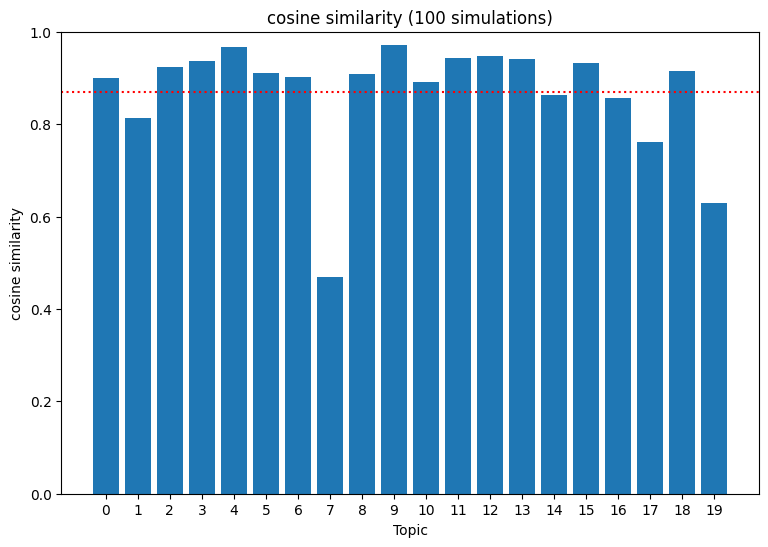

In [31]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("cosine similarity")
ax.set_title("cosine similarity ({} simulations)".format(num_simulations))
plt.savefig("../../gtm_cossim.png")
plt.show()

#### by correlation coefficient

In [44]:
df_corr = calculate_score(
    model_type="gtm",
    score_type="correlation",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior="dirichlet",decoder_type="sage",)

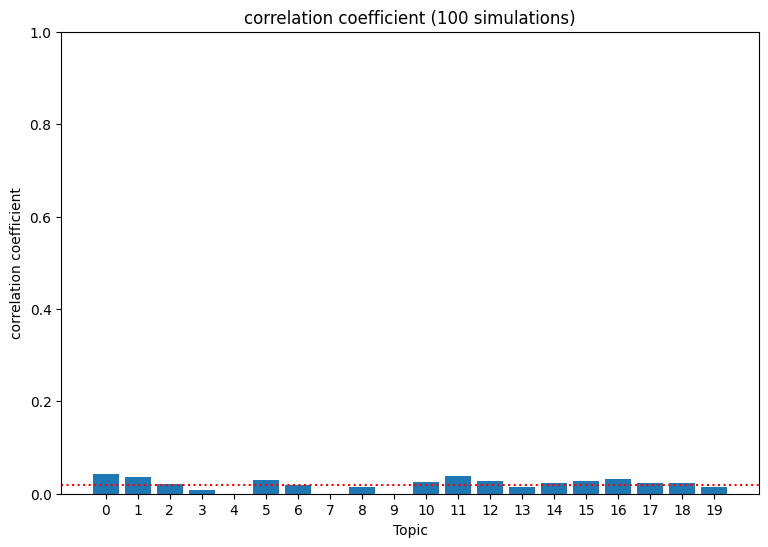

In [45]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
correlation_mean = df_corr.mean()
correlation_var = df_corr.var()
ax.bar(x, correlation_mean, yerr=correlation_var)
ax.axhline(correlation_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("correlation coefficient")
ax.set_title("correlation coefficient ({} simulations)".format(num_simulations))
plt.savefig("../../gtm_correlation.png")
plt.show()

#### keywords

In [34]:
df_keywords = calculate_score(
    model_type="gtm",
    score_type="keywords",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior="dirichlet",decoder_type="sage",)

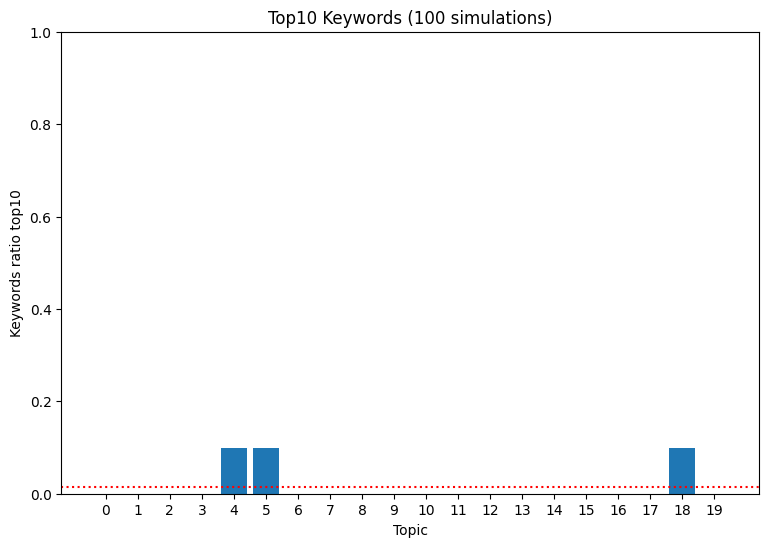

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
key_mean = df_keywords.mean()
key_var = df_keywords.var()
ax.bar(x, key_mean, yerr=key_var)
ax.axhline(key_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1.0)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Keywords ratio top10")
ax.set_title("Top10 Keywords ({} simulations)".format(num_simulations))
plt.savefig("../../gtm_10keyword.png")
plt.show()

#### Euclid distance

In [36]:
df_euclid = calculate_score(
    model_type="gtm",
    score_type="euclid",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict,
    doc_topic_prior="dirichlet",decoder_type="sage",)

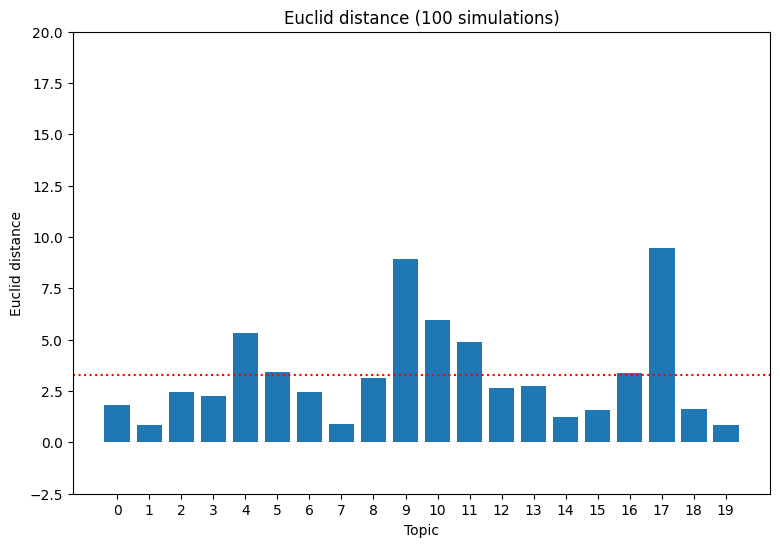

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
euclid_mean = df_euclid.mean()
euclid_var = df_euclid.var()
ax.bar(x, euclid_mean, yerr=euclid_var)
ax.axhline(euclid_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(-2.5, 20)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Euclid distance")
ax.set_title("Euclid distance ({} simulations)".format(num_simulations))
plt.savefig("../../gtm_distance.png")
plt.show()